# cp4. 모델 훈련

머신러닝의 작동 원리를 이해하는 것을 목표로 한다.
<br>가장 간단한 모델 중 하나인 선형 회귀로 시작하며, 두 가지 방법을 설명한다

1. 직접 계산 가능한 공식을 사용해 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함
2. 경사 하강법 (Gradient Discent) 라 불리는 반복적인 최적화 방식을 사용해 모델 파라미터를 바꿈, 비용함수를 최소화

## 4-1 선형 회귀

1장의 삶의 만족도에 대한 선형 회귀 모델은 다음과 같다.
$$ 삶의 만족도 = \theta_0 + \theta_1 * 1인당 GDP$$

이를 통해 알 수 있는 선형 회귀 모델은 다음의 형태와 같다는 사실을 알 수 있다.
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 .... + \theta_nx_n $$
- y: 예측값 , n: 특성의 수
- xi: i번째 특성값,  thetaj: j번째 모델 파라미터

이 식을 벡터형태로 간단하게 쓰면 다음과같이쓸 수 있다.

$$ \hat{y} = h_\theta (x) = \theta \cdot x $$
- theta: theta0부터 thetan까지의 특성 가중치를 담은 모델의 파라미터 벡터
- x: x0에서 xn까지 담은 샘플의 특성벡터. x0은 항상 1.
- h(theta): 모델 파라미터 theta를 사용한 가설함수

이런 선형회귀모델에선 성능지표 표시를 위해 RMSE를 사용한다. 훈련 세트 x에 대해 RMSE를 최소화하는 theta를 찾는것이다.
<br>훈련세트 X에 대한 RMSE는 다음과 같이 계산한다.

$$ MSE(X, h_\theta) = \frac{1}{m} \sum^m_{i=1} (\theta^T x^{(i)} - y^{(i)} )^2 $$

위 식에선 모델 파라미터 벡터 theta를 표현하기 위해 h 대신 h_theta 를 사용하였다.
<br> 간단한 표시위해 MSE(theta) 라고 표시하겠다.



### 4-1.1 정규방정식

- 비용함수를 최소화하는 theta값을 찾는 해석적인 방법.
- (다른말) 바로 결과를 얻을 수 있는 수학공식

$$ \hat{\theta} = (X^T X)^{-1} X^T y $$

- hat theta는 비용 함수를 최소화 하는 theta값이다.
- y는 y^1 부터 y^m까지 포함하는 타긴 벡터이다.

아래 코드는 공식을 테스트하는 코드들이다.

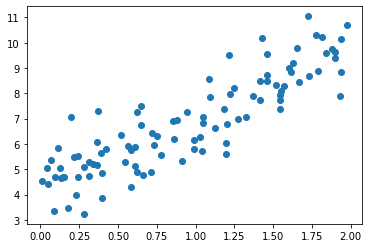

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

# 공식 테스트를 위한 선형처럼 보이는 데이터 생성과정

In [235]:
#정규 방정식을 이용한 hat theta의 계산

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

#theta0은 4, theta1은 3이 기대되던 상황.
#정확히 맞추지는 못했다.

[[4.21509616]
 [2.77011339]]


In [236]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

#hat theta를 통한 예측

[[4.21509616]
 [9.75532293]]


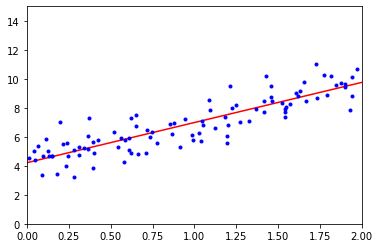

In [237]:
#모델의 예측을 그래프로 표시 (붉은 색 직선)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

아래는 사이킷런을 통해 선형회귀를 수행하고, 예측값을 출력하는 코드이다.

In [238]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("\n", theta_best_svd)
#LinearRegression 클래스는 scipy.linalg.lstsq()함수를 기반으로 하였으며, 이를 불러올 수 있다.


np.linalg.pinv(X_b).dot(y) 
#유사 역행렬을 구해주는 함수
#일반적인 역행렬은 존재하기 위한 조건이 있으나(정사각행렬, 행렬값이 0이 아님), 
#유사 역행렬은 조건을 만족하지 않더라도 구할 수 있다.


[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]

 [[4.21509616]
 [2.77011339]]


array([[4.21509616],
       [2.77011339]])

위에서 정규 방정식은 $XX^{-1}$의 역행렬을 계산하는 방정식으로, 계산 복잡도는 약 $O(n^{2.3})$ ~ $O(n^{3.0})$ 사이이다.

마지막 코드에서 언급한 SVD(특잇값 분해) 를 사용한 유사 역행렬을 구하는 방식은 계산 복잡도가 $O(n^2)$이다.

따라서, 굉장히 많은 수의 데이터를 다룰 때 둘 다 느려지나, SVD를 사용하는 방법이 훨씬 느린 속도로 느려진다.

## 4.2 경사 하강법

- 일반적인 최적화 알고리즘 (여러 문제에서 최적의 해법을 찾음)
- 비용 함수의 최소화를 위해 파라미터를 조정해감

경사 하강법의 순서는 다음과 같다.
1. Cost Function에서 임의의 값 W를 잡는다.
2. W에서 Cost Function의 Gradient(경사)를 구한다.
3. 경사를 통해 Cost Function이 감소하는 방향 + Gradient가 감소하는 방향으로 W를 이동시킨다.
4. Gradient가 0이 될 때 까지 2~3을 반복한다.

<br>위 과정에 쓰이는 파라미터 '학습률' 은 W의 이동 간격에 영향을 미치는 매우 중요한 파라미터이다.
- 너무 작으면 학습하는데 시간이 오래걸리고, 너무 크면 학습이 안된다.

### 4.2.1 배치 경사 하강법

- 매 스텝에서 훈련 데이터 전체를 사용하는 경사 하강법

<br>경사 하강법을 구현하기 위해 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야한다.
<br>이 그래디언트를 __편도함수__ 라고 한다.

$\theta_j$에 대한 비용함수의 편도함수는 다음과 같이 구할 수 있다.

$$\frac{\delta}{\delta \theta_j} MSE(\theta) = \frac{2}{m} \sum^m_{i=1}(\theta^T x^{(i)} - y^{(i)} ) x_j^{(i)}$$

파라미터에 대한 편도함수를 각각 계산하는 대신에 한꺼번에 계산할 수 있으며, 식은 다음과 같다.

$$ \bigtriangledown_\theta MSE(\theta) = 
\left[
\begin{matrix}
    \frac{\delta}{\delta \theta_0} MSE(\theta) \\
    \frac{\delta}{\delta \theta_1} MSE(\theta) \\
    \vdots & \\
    \frac{\delta}{\delta \theta_n} MSE(\theta) \\
\end {matrix}
\right] 
= \frac{2}{m}X^T(X\theta- y )$$


<br>그라디언트가 양의 값이라면 뒤로 가야하고, 그라디언트가 음의 값이라면 앞으로 가야한다.
<br>이는 $\theta_j$에서 $ \bigtriangledown_\theta MSE(\theta)$를 빼야 한다는 뜻이다.
<br>또한, 내려가는 스텝의 크기를 결정하기 위해 그라디언트 벡터에 학습률을 곱해야한다.

최종적으로 정해지는 학습의 공식은 다음과 같다.


$$\theta^{(next step)} =  \theta - \eta \bigtriangledown_\theta MSE (\theta) $$

아래는 경사 하강법 스텝에 대한 간단한 구현이다.

In [240]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위로 theta를 초기화한다.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    #위에서 작성한 MSE(theta) 식을 구현함.
    theta = theta - eta * gradients

In [241]:
# 이 코드를 통해 theta를 확인한다.
print(theta)
#정규 방정식으로 찾은 값과 완전히 같다

[[4.21509616]
 [2.77011339]]


[]

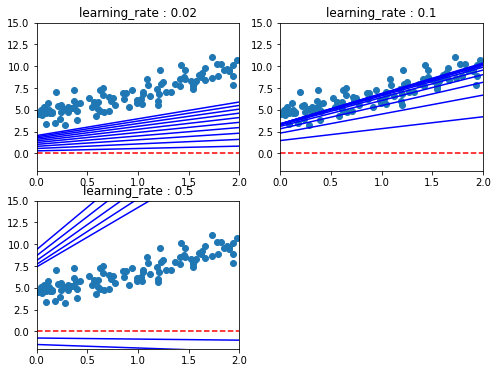

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))

plot_address = 221

eta_test1 = 0.02
eta_test2 = 0.1
eta_test3 = 0.5

eta_list = [eta_test1, eta_test2, eta_test3]
n_iterations = 10
m = 100

thetas = np.zeros([2, 1])

def line_maker(theta):
    W = theta[0]
    b = theta[1]
    x1 = 0
    x2 = 2
    y1 = W * x1 + b
    y2 = W * x2 + b
    
    return [x1, x2], [y1, y2]
# 두 점을 가져오는 함수


for eta in eta_list:
    learningrate = eta
    eta_theta = thetas.view()
    plt.subplot(plot_address)
    
    plt.axis([0, 2, -2, 15])

    plt.scatter(X,y) # 데이터들을 점으로 찍음
    xs, ys = line_maker(eta_theta)
    plt.plot(xs, ys, 'r--') # 시작 선은 붉은색 점선으로 표시
    plt.title("learning_rate : " + str(eta)) #eta가 몇인가를 그래프 제목으로 설정
    
    for iteration in range(n_iterations): # 선형 회귀를 하면서 직선을 그려감
        gradients = 2/m * X_b.T.dot(X_b.dot(eta_theta)-y)
        #위에서 작성한 MSE(theta) 식을 구현함.
        eta_theta = eta_theta - eta * gradients
        
        xs, ys = line_maker(eta_theta)
        plt.plot(xs, ys, 'b')
        
    plot_address = plot_address + 1
    
        
plt.plot()
        
        
    

위 그래프는 eta값을 달리하여 학습 경과에 따른 예측값을 그린 그래프이다.

eta값이 너무 작은 0.02일 경우엔 10번의 반복만에 학습이 되지 않는 모습을, 
<br> eta값이 너무 큰 0.5일 경우엔 너무 크게 뛰어 화면을 벗어나는 모습을 보인다.

이처럼 learning rate 값에 따라 반복 횟수가 달라지기도 한다. 너무 적으면 학습이 다 끝나지 않을 것이고,
너무 많으면 시간이 낭비될 것이다.
<br>이런 문제점을 해결하기 위해 그라디언트 벡터가 __허용오차__보다 작아지면 학습을 멈추도록 한다.

### 4.2.2 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)

- 매 스텝에서 하나의 샘플을 무작위로 선택, 그라디언트를 계산하는 방식
- 배치 경사 하강법의 문제점인 훈련세트가 커지면 느려진다는 단점 보완, 하지만 매우 불안정함. (평균적으로 감소한다 정도)
- 이때문에 알고리즘이 멈추면, 좋은 파라미터는 구해지나, 최선의 파라미터는 아님.
- 대신, 비용함수가 불규칙 하다면 전역 최솟값을 찾을 확률이 배치 경사 하강법보다 큼.

최솟값에 도달하지 못한다는 문제점이 있기 때문에, 그 점을 해결하기 위해 맨 처음에는 큰 학습률을 사용하다, 갈 수록 학습률을 줄여가면서 학습시키는 방식을 사용한다.

- 이와 비슷한, 담금질 기법이라는 알고리즘이 있음.
- 반복된 학습에서 학습률을 결정하는 함수를 학습스케줄이라 함.
- 이 또한 너무 빨리 줄어들면 중간에 멈추거나, 너무 천천히 줄어들면 오랫동안 머무는 등의 문제가 생길 수 있음.

다음 코드는 학습 스케줄을 이용한 확률적 경사 하강법을 구현한 코드이다.

In [243]:
#우리 스터디 사람들이 궁금해하던 SGD가 이 확률적 경사 하강법이다.

n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄의 하이퍼 파라미터
def learning_schedule(t):
    return t0 / (t+t1)

theta_rand = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m): #훈련세트에 있는 샘플수만큼 반복한다
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]# random_index 번째 원소 가져오기.
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_rand) - yi)
        eta = learning_schedule(epoch * m + i) # 학습 스케줄로 학습률을 줄인다.
        theta_rand = theta_rand - eta * gradients #theta 값 업데이트

In [244]:
#구해진 theta값 확인
theta_rand

#50번의 반복만으로 훌륭한 값을 얻은 것을 확인할 수 있다.

array([[4.18475289],
       [2.73036719]])

위의 무작위는 무작위로 뽑는 방식을 사용하여 하나의 샘플이 여러번 뽑힐수도 있고 안뽑힐 수도 있다.
<br>이런 케이스가 안나오는 방법은 앞에서부터 하나씩 사용하고, 샘플들을 셔플하는 방법이 있으나 비교적 느리게 수렴한다.

<br>다음 코드는 제곱 오차 비용 함수를 최적화하는 SGDRegressor 함수를 사용한 SGD 구현이다.
<br>또한 한 에포크에서 0.001보다 적게 손실이 줄어들때까지 시행한다. (tol = 0.001 = 1e-3)
<br>학습률은 0.1, 제약은 없는 상태로 시작한다. (eta0=0.1, penalty=None)

In [245]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, eta0=0.1, penalty=None)
sgd_reg.fit(X, y.ravel())  

# SGDRegressor클래스를 통해 정의한 1000epochs, 조건 오차차이 0.001, 학습률 0.1인 
#SGD를 수행하는 클래스를 선언, 학습을 수행한다.

SGDRegressor(eta0=0.1, penalty=None)

In [246]:
sgd_reg.intercept_, sgd_reg.coef_
#학습이 완료된 값이 위의 SGD 결과, 정규 방정식 결과와 비슷하게 나온것을 볼 수 있다.

(array([4.22609703]), array([2.79227913]))

### 4.2.3 미니배치 경사 하강법

- 전체 훈련세트, 무작위 하나의 샘플이 아닌, __미니배치__ 라 부르는 임의의 작은 샘플 세트에 대해 그라디언트를 계산하는 방법
- SGD와 비교했을때 행렬연산을 수행하므로 이와 최적화된 GPU등의 하드웨어를 이용한 성능 향상이 가능해진다는 장점이 있다.
- 미니배치의 크기가 꽤 된다는 전제하에 SGD보다 안정적이나, 지역최소를 벗어나기 힘든 단점이 있다.

## 4.3 다항회귀

가지고 있는 데이터가 비선형이라도 선형 모델을 사용할 수 있다.
<br>이는 각 특정의 거듭제곱을 새로운 특성으로 추가하며 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법을 사용한다.

이는 $ax^2 + bx + c$ 를 구현하기위해 $\left[ \begin{matrix} a & b \end{matrix} \right] \left[ \begin{matrix} x^2 \\ x \end{matrix} \right] + c$ 형태를 사용하는것이라 생각할 수 있다. 
<br>이 방식을 사용하기 위해 $x^2$을 특성에 추가하여 사용한다.

아래는 예시를 위한 간단한 잡음을 포함한 2차방정식의 비선형 데이터 생성 코드이다.

In [248]:
mn = 100
X2 = 6 * np.random.rand(mn,1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np.random.randn(m,1) 
#y2 식의 마지막 randn은 위에서 말한 잡음에 해당한다.

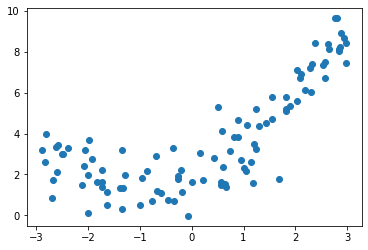

In [249]:
plt.scatter(X2, y2)
plt.show()
# 위의 비선형 데이터를 그래프로 생성하는 코드이다.

다음 코드는 위에서 제시한, 특성의 거듭제곱을 새로운 특성으로 추가하는 코드이다.
<br>여기에선 sklearn의 PolynomialFeatures를 사용한다.

In [250]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X2)
print(X2[0],X_poly[0])

[2.94407494] [2.94407494 8.66757727]


이제 학습시킬 특성은 특성과 특성의 제곱으로 이루어져있다. 이를 LinearRegression에 적용한다.

In [251]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y2)
# LinearRegression 클래스를 불러오고 fit를 이용해 학습을 시킨다.
#X_poly는 2, 1 크기를 가지고 있으므로, 행렬곱의 형태가 될 것이다.

print("-"*50)
lin_reg.intercept_, lin_reg.coef_

--------------------------------------------------


(array([1.89554823]), array([[0.95707476, 0.49025797]]))

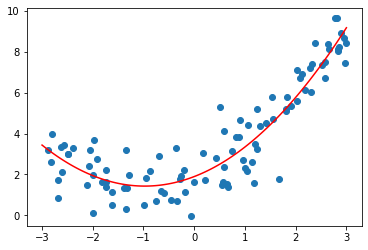

In [252]:
plt.scatter(X2, y2)
x_n = np.linspace(-3, 3, 100). reshape(100,1)
#-3 부터 3까지 100개의 숫자 나열, 100, 1 크기 array로 바꿈
x_n_poly = poly_features.transform(x_n)
y_predict = lin_reg.predict(x_n_poly)
plt.plot(x_n, y_predict, 'r')

plt.show()

PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가한다는 언급이 있는데, 이는 $(a+b)^3$ 에서 $a^3, a^2b, ab^2, b^3$이 모두 추가된다는 것을 이야기한다.

# 4.4 학습 곡선

모델이 데이터에 과적합 / 과소적합 되었는지에 대해 어떻게 알 수 있을까?
- 교차 검증을 이용해 성능과 교차 검증 점수를 비교한다. 성능만 높다면 과적합, 둘 다 낮다면 과소적합이다.
- 학습 곡선을 살펴본다 

학습 곡선은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(or 반복 횟수)의 함수로 나타낸다.
훈련세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키는 것으로 그래프를 생성할 수 있다.

다음 코드는 주어진 훈련 데이터에 대한 모델의 학습 곡선을 그리는 함수이다.

In [307]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "test_set")
    plt.legend()
    plt.ylim(0.0, 3.0)

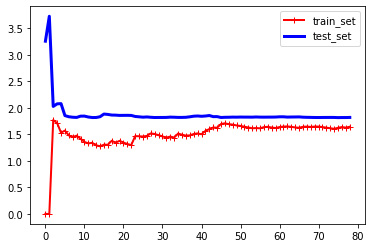

In [302]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X2, y2)

#자꾸 바뀌는데...?

위 모델은 과소적합된 상태이다.

#### 훈련데이터에 대해 
- 첫번째 데이터는 0으로 시작, 샘플이 하나 둘일땐 완벽히 작동함.
- 곡선이 어느정도 평평해질 때 까지 오차가 계속 상승함.
- 그 이유는 샘플이 추가되며 잡음이 추가되거나 정보가 비선형이기 때문.


과소적합 그래프의 대표적인 형태
- 두 곡선이 수평한 구간을 만든다.
- 꽤 높은 오차에서 매우 가까이 붙어있다


그리고 다음은 10차 다항회귀 모델의 학습 곡선을 그리는 코드이다.

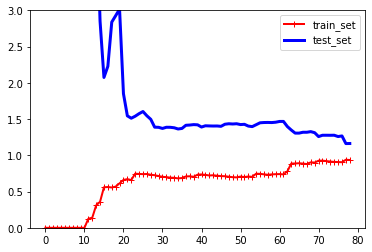

In [309]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X2, y2)

위 모델은 과대적합된 상태이다.

#### 과대적합된 모델의 특징
- 훈련데이터의 오차가 선형회귀모델보다 훨씬 작다
- 두 곡선 사이에 공간이 존재한다 (훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬낫다)

### 편향 / 분산 트레이드오프

모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.

#### 편향
2차 데이터에 선형으로 가정하는 등, 잘못된 가정으로 인해 발생하는 오차
<br>편향이 큰 모델은 과소적합되기 쉽다
<br>
#### 분산
훈련 데이터의 작은 변동에 모델이 과도하게 반응하기 때문에 발생하는 오차
<br>분산이 큰 모델은 과대적합되기 쉽다
<br>
#### 줄일 수 없는 오차
데이터 자체에 있는 잡음 때문에 발생하는 오차, 없애려면 데이터 자체에 손을 대야만 함.
<br>
<br>
모델의 복잡도가 변하면 편향/ 분산 또한 변하게 되는데, 
<br>복잡도가 커지면 편향이 커지고 분산이 작아지며, 복잡도가 작아지면 분산이 커지고 편향이 작아진다.
이를 __편향 / 분산 트레이드 오프__ 라고 한다.

# 4.5 규제가 있는 선형 모델
과대적합을 감소시키는 좋은 방법 중 한가지는 모델을 규제하는것이다.
<br>자유도를 줄였을 때 데이터에 과대적합되기가 어려워지기 떄문이다. 예시로 다항회귀는 다항식의 차수를 감소시키는 방법을 썼다.
<br>선형 회귀 모델에서는 모델의 가중체 제한을 통한 규제를 사용한다.

## 4.5.1 릿지 회귀 (l2 panalty)

릿지회귀(__티호노프 규제__ ) : 규제가 추가된 선형회귀
<br>규제항 $\alpha \sum^n_{i+1} \theta_i^2$이 비용함수에 추가됨.
<br>학습 알고리즘을 데이터에 맞추고 모델의 가중치가 작도록 유지하는 효과가 있다.
<br>학습 이후 평가는 규제가 없는 성능 지표로 평가한다.

<br>하이퍼 파라미터 $\alpha$는 모델의 규제 수준을 조절한다. 
- 0에 가까울 수록 선형 회귀와 같아짐
- $\alpha$의 값이 매우 크다면 모든 가중치가 0에 가까워져 데이터의 평균을 지나는 수평선이 됨.

$$J(\theta)=MSE(\theta)+\alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i $$
- 릿지 회귀의 비용 함수는 다음과 같다.

In [319]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X2,y2)
ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [323]:
# 확률적 경사 하강법을 사용했을 떄
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X2, y2.ravel())
sgd_reg.predict([[1.5]])

array([5.05735221])

## 4.5.2 라쏘 회귀 (l1 panelty)
또다른 선형회귀의 규제된 버전, $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터 $l_1$ 노름을 사용함.

$$ J(\theta) = MSE(\theta) + \alpha \sum^n_{i=1}|\theta_i| $$

- 라쏘 회귀의 비용 함수

라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려고 한다는 특징이 있다.
다르게 표현하면, 자동으로 특성을 선택하고 __희소 모델__ 을 만든다고 할 수 있다.

라쏘의 비용함수는 $\theta_i = 0$ 일 때 미분이 불가능하지만 __서브그라디언트 벡터 g__ 를 사용하면 문제없이 GD를 적용할 수 있다.

$$ g(\theta,J) = \bigtriangledown_\theta MSE(\theta) + \alpha \left[
\begin{matrix}
    sign(\theta_1) \\
    sign(\theta_2) \\
    \vdots \\
    sign(\theta_n) \\
\end {matrix}
\right] $$

여기서 $sign(\theta_i)$ 는 $\theta_i < 0$일때 $-1$, $\theta_i = 0$일때 $0$, $\theta_i > 0$일때 $1$이다. 

아래는 Lasso 클래스의 간단한 예제코드이다.

In [326]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X2, y2)
lasso_reg.predict([[1.5]])

#Lasso 대신 SGDRegressor(penalty = "l1") 또한 사용할 수 있음

array([5.04247738])

## 4.5.3 엘라스틱넷
엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.
<br>=릿지와 회귀의 규제항을 단순히 더해 사용, 혼합정도는 혼합비율 r을 사용해 조절한다.

$$J(\theta)=MSE(\theta)+r \alpha \sum^n_{i=1}|\theta_i|+\frac{1-r}{2}\alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i $$


__세 개의 규제포함회귀 중 무엇을 사용해야할까?__
- 기본적으로 릿지를 사용한다.
- 특성이 몇 개 밖에 안된다는 느낌이 들 땐 라쏘, 혹은 엘라스틱넷을 사용한다.
- 특성 몇개가 강하게 연관되면 라쏘가 문제를 일으킬 확률이 높으므로, 엘라스틱넷을 사용한다.

다음은 엘라스틱넷의 간단한 예제코드이다.

In [327]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X2,y2)
elastic_net.predict([[1.5]])

array([5.04191364])

## 4.5.4 조기종료

검증 에러가 최솟값에 도달하면 훈련을 중지시키는 방법이다.
<br>경사 하강법처럼 반복적인 학습 알고리즘을 규제함
<br>최소에서 바로 학습을 멈춰 과대적합을 막는다.

아래는 조기종료에 대한 기본적인 구현 코드이다.

In [334]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2[:50], y2[:50].ravel(), test_size=0.5, random_state=10)

#변수 설정

In [338]:
from sklearn.base import clone


#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X2_train)
X_val_poly_scaled = poly_scaler.transform(X2_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y2_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y2_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀 
- 분류문제에 사용할 수 있는 회귀 알고리즘.
- 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨.
- 확률이 50이 넘는다면 해당 클래스에 속하고(__양성 클래스__ ), 그렇지 않으면 해당 클래스에 속하지 않는다고 판단(__음성 클래스__ )

## 4.6.1 확률 추정
로지스틱 회귀는 결과를 출력하지 않고 결괏값의 __로지스틱__ 을 출력한다.

$$\hat{p} = h_0 (x) = \sigma(\theta^T x) $$
- 로지스틱 회귀 모델의 확률 추정식

여기서 $\sigma(x)$ 는 시그모이드 함수이다
$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$
- 시그모이드 함수

확률 추정식을 이용하여 최종 결과를 출력할 수 있다.
$$\hat{y} = \begin{cases}
0, & \mbox{if    } \hat{p} < 0.5 \\
1, & \mbox{if    } \hat{p} > 0.5
\end{cases}$$

$x < 0$ 일 때 $\sigma(x) < 0.5$, $x \geq 0$ 일 때 $\sigma(x) \geq 0.5$ 이므로,
<br>$\hat{p}$는 $\sigma^T x$에 의해 결정된다.


## 4.6.2 훈련과 비용 함수

$$c(\theta) = \begin{cases} 
-\log (\hat{p}), & \mbox{if  } y = 1 \\
-\log (1-\hat{p}), & \mbox{if  } y = 0
\end{cases}$$

- 하나의 훈련 샘플에 대한 비용 함수

여기서 $\theta$에 대해 출력된 확률 p로 두고 레이블이 양성 / 음성인 경우에 따라 달라진다. 
log는 0에 가까울 수록 무한으로 가까워지므로, 레이블과 반대되는 확률에 가까워지면 비용이 커진다.

이 함수를 전체 샘플에 대해 확장하면 다음 식으로 쓸 수 있다.
$$J(\theta) = -\frac{1}{m}\sum^m_{i=1}\left[ y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)}) \right] $$ 
- 로지스틱 회귀의 비용함수

여기서 y는 해당 샘플에 대한 label 값이다.

최솟값이 아니나, 볼록 함수이므로, 경사하강법으로 최솟값을 찾을 수 있다.
<br>해당 식은 비용 함수의 j번째 모델 파라미터 $\theta_j$에 대해 편미분을 한 결과이다.

$$\frac{\delta}{\delta \theta_j}J(\theta) = \frac{1}{m} \sum^m_{i=1}(\sigma(\theta^T x^{(i)}) - y^{(i)})x_j^{(i)}$$





아래는 꽃잎의 너비를 기반으로 Iris_Versicolor 종을 감지하는 분류기이다. 
<br>데이터의 로드 - 훈련 - 확률계산+그래프 출력 순서로 작성하였다.

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
forprint = list(iris.keys())
print(forprint)

X = iris["data"][:, 3:]#꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)
#iris_Virginica면 1을, 그렇지 않으면 0 값으로 초기화

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


C:\Users\Lee-PC\AppData\Local\Temp\ipykernel_9168\2977360921.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()#모델 클래스
log_reg.fit(X,y)  #로지스틱 회귀로 학습한다.

LogisticRegression()

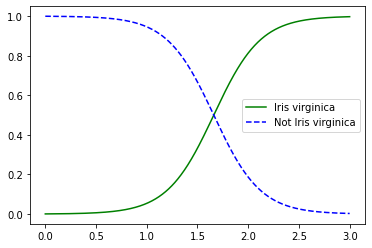

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

위 데이터 셋에서 Iris virginica 꽃잎 너비는 1.4~2.5cm에 분포하지만 다른 꽃은 0.1~1.8cm에 분포한다.
<br> 그래서 0.0~1.0, 2.0~3.0은 결과가 매우 확연하게 나타나있음을 볼 수 있다.

확률이 50퍼센트인 부분은 1.6 근처에서 나타나는데, 따라서 1.6보다 작다면 Not Iris, 1.6보다 크다면 Iris virginica로 분류할 것이다. 이 값의 위치를 __결정 경계__ 라 한다.

In [15]:
log_reg.predict([[1.7], [1.3], [0.1], [2.0]])

array([1, 0, 0, 1])

로지스틱 회귀도 다른 선형 모델처럼 $l_1$, $l_2$ 패널티를 사용하여 규제할 수 있으며, $l_2$가 기본이다.

p.198에 두 개의 특성을 가지고 학습한 그래프가 있으며, 거기서 결정 경계는 직선으로 나타난다는 점에 주목해야한다.

## 4.6.4 소프트맥스 회귀

로지스틱 회귀를 다중 클래스를 지원하도록 일반화 할 수 있으며, 이를 __소프트맥스 회귀__ , __다항 로지스틱 회귀__ 라 한다.

__소프트맥스 회귀의 실행 방법__
1. 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(x)$ 를 계산한다.
2. 각 클래스 k에 대한 점수에 __소프트맥스 함수__ 를 적용하여 각 클래스의 확률을 추정한다.

$$s_k(x) = (\theta^{k})^Tx$$
- 클래스 k에 대한 소프트맥스 점수

각 클래스는 자신만의 함수 $\theta{(k)}$가 있으며, __파라미터 행렬__ 에 저장된다.

$$\hat{p_k} = \theta(s(x))_k = \frac{exp(s_k(x)}{\sum^K_{j=1}exp(s_j(x))}$$
- 소프트맥스 함수

로지스틱 회귀와 같이 소프트맥스 분류기는 확률이 가장 높은 클래스를 선택함. 

### 크로스 엔트로피 (Cross-Entropy Loss)

크로스 엔트로피 : 확률 분포가 주어졌을 때 확률 분포가 비슷한 정도를 나타내는 수치
<br>크로스 엔트로피의 값이 작을수록 확률분포가 레이블의 분포와 비슷해지게 되고, 따라서 값을 최소화해주는 것이 중요하다.

$$J(\theta) = -\frac{1}{m} \sum^m_{i=1} \sum^K_{k=1}y_k^{(i)}\log (\hat{p}_k^{(i)})$$
- 크로스 엔트로피

$$\bigtriangledown_{\theta^{(k)}}J(\theta) = \frac{1}{m} \sum^{m}_{i=1}(\hat{p}_k^{(i)} - y_k^{(i)})x{(i)}$$
- 크로스 엔트로피의 도함수

LogisticRegression의 multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있다.<br>
소프트맥스 함수는 하나의 클래스만 예측하므로 상호 배타적인 클래스에서만 사용할 수 있으며, 여러 사람의 얼굴 인식 등에는 사용할 수 없다.

In [16]:
X = iris["data"][:, (2, 3)] #꽃잎의 길이와 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [18]:
softmax_reg.predict([[5, 2]])
#softmax로 학습한 걸로 예측한다.

softmax_reg.predict_proba([[5, 2]])
# 94.2퍼센트 확률로 2 츨력, 5.74퍼센트 확률로 1 출력

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 설정용 import함수 모음 